In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import random ,pickle , nltk , string , gc

import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier , PassiveAggressiveClassifier , Perceptron
import emoji , re


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')




from datetime import datetime
from sklearn.metrics import accuracy_score , precision_score , f1_score
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier



import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

vector_tf = TfidfVectorizer(max_features = 4000)
tfidf_transformer = TfidfTransformer()

pipe = Pipeline([('count', vector_tf),
    ('tfid', TfidfTransformer())])

In [10]:
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3,validation_fraction=0.3,warm_start=True)
pcp = Perceptron(tol=1e-3, random_state=0,warm_start=True,validation_fraction=0.3)
sgdc = SGDClassifier(max_iter=1000, tol=1e-3,loss = 'log_loss',warm_start = True)
lrc = LogisticRegression(solver='liblinear', penalty='l1',warm_start = True)
mnb = MultinomialNB()
bnb = BernoulliNB(force_alpha=True)





In [6]:

clfs ={     
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb ,
    'SGDClassifier' : sgdc ,
    'PassiveAggressiveClassifier' : sgdc ,
    'Perceptron' : pcp

    }
classifier_list = ['LRC' , 'Mnb','Bnb','SGDC','PAC','Perceptron']
accuracy_scores = []
precision_scores = []
f1_scores = []

In [7]:
def train_classifer(clf,X_train,y_train,X_test,y_test):
  clf.partial_fit(X_train,y_train,classes = [0,1])
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  f1score = f1_score(y_test, y_pred,average='micro')
  
  return accuracy,precision,f1score
    

In [8]:
def basic_clean(x) :

    
  words  = emoji.demojize(x.lower())
  #print(words)
  
  
  words = re.sub('[^a-zA-Z0-9\n\.]', ' ', "".join(words))
  
  words = word_tokenize(words)
  final = []
  

  
  for word in words :
      if (word not in stop_words) and (word not in string.punctuation) and (word != 'rt') and word.isalnum():
        final.append(ps.stem(word))
  words =  ' '.join(final[:])
  #print(words)
  return words

In [1]:
pipe = pickle.load(open('/content/drive/MyDrive/nlp models/pipe.pkl', 'rb'))

NameError: name 'pickle' is not defined

In [14]:
'''
df = pd.read_csv('/content/drive/MyDrive/emotion.csv',encoding = 'latin-1',usecols  = ['text']).sample(frac=1)
df['text'] = df['text'].apply(lambda x :  basic_clean(x))
pipe.fit(df['text'])
del df
gc.collect()

pickle.dump(pipe,open('/content/drive/MyDrive/nlp models/pipe.pkl','wb'))
'''

In [10]:
for i in range(30):
  df = pd.read_csv('/content/drive/MyDrive/emotion.csv',encoding = 'latin-1',usecols  = ['Target','text']).sample(frac=0.04)
  # 0 is Negative , 4/1 is positive
  
  df['Target'] = df['Target'].replace(4,1)
  df['text'] = df['text'].apply(lambda x :  basic_clean(x))
  #df.drop(columns = ['text'],inplace=True)
  gc.collect()

  print('------------------------------------------------------------------- Epoch {} ------------------------------------------------------------- '.format(i))
  print('Shape of training data  : {} \n'.format(df.shape))
  
  #print(corpus_vector[0:1])
  #corpus_vector = tfidf.fit_transform(X).toarray()
  X_train,X_test,y_train,y_test = train_test_split(pipe.transform(df['text']).toarray(),df.Target,test_size=0.3,random_state=101)

  del df
  gc.collect()

  accuracy_scores = []
  precision_scores = []
  f1_scores = []

  


  #LogisticRegression


  start_time = datetime.now() 
  lrc.fit(X_train,y_train)
  y_pred = lrc.predict(X_test)
  current_accuracy = accuracy_score(y_test,y_pred)
  current_precision = precision_score(y_test,y_pred)
  current_f1_score = f1_score(y_test, y_pred,average='micro')
  end_time = datetime.now() 
  
  print("LogisticRegression | Accuracy : {:.2f} | Precision : {:.2f} | F1 Score : {:.2f} | Time Taken : {}\n\n".format(current_accuracy,current_precision,current_f1_score,end_time - start_time))   
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  f1_scores.append(current_f1_score)

  for name , clf in clfs.items():

    start_time = datetime.now() 
    current_accuracy , current_precision , current_f1_score = train_classifer(clf,X_train,y_train,X_test,y_test)
    end_time = datetime.now()
    
    print("{} | Accuracy : {:.2f} | Precision : {:.2f} | F1 Score : {:.2f} | Time Taken : {}\n\n".format(name ,current_accuracy,current_precision,current_f1_score,end_time - start_time))   
  
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)  

  
  

  print('\n\n')

  del X_train,X_test,y_train,y_test
  gc.collect()

  





------------------------------------------------------------------- Epoch 0 ------------------------------------------------------------- 
Shape of training data  : (64000, 2) 

LogisticRegression | Accuracy : 0.75 | Precision : 0.74 | F1 Score : 0.75 | Time Taken : 0:00:01.523682


MultinomialNB | Accuracy : 0.75 | Precision : 0.75 | F1 Score : 0.75 | Time Taken : 0:00:00.350776


BernoulliNB | Accuracy : 0.76 | Precision : 0.75 | F1 Score : 0.76 | Time Taken : 0:00:01.081341


SGDClassifier | Accuracy : 0.77 | Precision : 0.76 | F1 Score : 0.77 | Time Taken : 0:00:00.176301


PassiveAggressiveClassifier | Accuracy : 0.77 | Precision : 0.76 | F1 Score : 0.77 | Time Taken : 0:00:00.185332


Perceptron | Accuracy : 0.69 | Precision : 0.63 | F1 Score : 0.69 | Time Taken : 0:00:00.195621







In [ ]:
'''

Dump
pickle.dump(sgdc,open('/content/drive/MyDrive/nlp models/sgdc.pkl','wb'))
pickle.dump(bnb,open('/content/drive/MyDrive/nlp models/bnb.pkl','wb'))
pickle.dump(pac,open('/content/drive/MyDrive/nlp models/pac.pkl','wb'))
pickle.dump(pcp,open('/content/drive/MyDrive/nlp models/pcp.pkl','wb'))
pickle.dump(mnb,open('/content/drive/MyDrive/nlp models/mnb.pkl','wb'))
pickle.dump(lrc,open('/content/drive/MyDrive/nlp models/lrc.pkl','wb'))
pickle.dump(mnb,open('/content/drive/MyDrive/nlp models/mnb.pkl','wb'))

'''

10

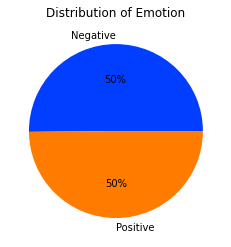

In [11]:
df = pd.read_csv('/content/drive/MyDrive/emotion.csv',encoding = 'latin-1',usecols  = ['Target','text']).sample(frac=0.06)
df['Target'] = df['Target'].replace(4,1)
df['text'] = df['text'].apply(lambda x :  basic_clean(x))
#df.drop(columns = ['text'],inplace=True)

gc.collect()


palette_color = sns.color_palette('bright')
plt.pie(Counter(df.Target).values(), labels=['Negative','Positive'], colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Emotion')

y = df.Target
X = pipe.transform(df['text']).toarray()
#print(corpus_vector[0:1])
#corpus_vector = tfidf.fit_transform(X).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

del df , X , y

gc.collect()

In [5]:
'''
sgdc = pickle.load(open('/content/drive/MyDrive/nlp models/sgdc.pkl', 'rb'))
bnb = pickle.load(open('/content/drive/MyDrive/nlp models/bnb.pkl', 'rb'))
mnb = pickle.load(open('/content/drive/MyDrive/nlp models/mnb.pkl', 'rb'))
pac = pickle.load(open('/content/drive/MyDrive/nlp models/pac.pkl', 'rb'))
pcp = pickle.load(open('/content/drive/MyDrive/nlp models/pcp.pkl', 'rb'))
lrc = pickle.load(open('/content/drive/MyDrive/nlp models/lrc.pkl', 'rb'))


'''


In [ ]:
'''
estimators = [('SGDC',sgdc),('BNB',bnb),('LRC',lrc),('MNB',mnb)]
voting = VotingClassifier(estimators,voting = 'soft')
voting.fit(X_train,y_train)
'''
# or load pickled classifier
voting = pickle.load(open('/content/drive/MyDrive/nlp models/voting.pkl', 'rb'))

In [12]:

y_pred1 = voting.predict(X_test)
print("VotingClassifier | Accuracy : {:.2f} | Precision : {:.2f} | F1 Score : {:.2f}\n\n".format(accuracy_score(y_test,y_pred1),precision_score(y_test,y_pred1),f1_score(y_test,y_pred1)))   
  
classifier_list.append('Voting')
accuracy_scores.append(accuracy_score(y_test,y_pred1))
precision_scores.append(precision_score(y_test,y_pred1))
f1_scores.append(f1_score(y_test,y_pred1))
del y_pred1
gc.collect()

VotingClassifier | Accuracy : 0.75 | Precision : 0.74 | F1 Score : 0.76




2426

In [13]:
pickle.dump(voting,open('/content/drive/MyDrive/nlp models/rfc.pkl','wb'))

In [ ]:
'''
estimators = [('SGDC',sgdc),('MNB',mnb),('PAC',pac)]
final_estimators = lrc
stacking = StackingClassifier(estimators = estimators , final_estimator = final_estimators)
stacking.fit(X_train,y_train)
'''
#or load existing pickled classifier
stacking = pickle.load(open('/content/drive/MyDrive/nlp models/stacking.pkl', 'rb'))

In [15]:

y_pred1 = stacking.predict(X_test)
print("StackingClassifier | Accuracy : {:.2f} | Precision : {:.2f} | F1 Score : {:.2f}\n\n".format(accuracy_score(y_test,y_pred1),precision_score(y_test,y_pred1),f1_score(y_test,y_pred1))  )
  
classifier_list.append('Stacking')
accuracy_scores.append(accuracy_score(y_test,y_pred1))
precision_scores.append(precision_score(y_test,y_pred1))
f1_scores.append(f1_score(y_test,y_pred1))
del y_pred1
gc.collect()


StackingClassifier | Accuracy : 0.75 | Precision : 0.74 | F1 Score : 0.76




48

In [16]:
pickle.dump(stacking,open('/content/drive/MyDrive/nlp models/stacking.pkl','wb'))

In [17]:
X = basic_clean('really happy that you were victorious')

corpus_vector = pipe.transform([X]).toarray()

In [18]:
sgdc.predict(corpus_vector)

array([1])

In [19]:
lrc.predict(corpus_vector)

array([1])

In [ ]:
'''
etc = pickle.load(open('/content/drive/MyDrive/nlp models/etc.pkl', 'rb'))
rfc = pickle.load(open('/content/drive/MyDrive/nlp models/rfc.pkl', 'rb'))
'''

In [53]:
def train_classifer_incremental(clf,X_train,y_train,X_test,y_test):
  clf.n_estimators = clf.n_estimators + 5
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  f1score = f1_score(y_test, y_pred,average='micro')
  
  return accuracy,precision,f1score

rfc = RandomForestClassifier(n_estimators=50,warm_start =True ,criterion = 'log_loss', n_jobs = -1 , random_state=100)
etc = ExtraTreesClassifier(n_estimators=50,warm_start =True ,criterion = 'log_loss',  n_jobs = -1 , random_state=100)


In [72]:
clfs ={     
    'RFC' : rfc,
    'ETC' : etc ,
    }
    

In [54]:
for i in range(30):
  df = pd.read_csv('/content/drive/MyDrive/emotion.csv',encoding = 'latin-1',usecols  = ['Target','text']).sample(frac=0.04)
  # 0 is Negative , 4/1 is positive
  
  df['Target'] = df['Target'].replace(4,1)
  df['text'] = df['text'].apply(lambda x :  basic_clean(x))
  #df.drop(columns = ['text'],inplace=True)
  gc.collect()

  print('------------------------------------------------------------------- Epoch {} ------------------------------------------------------------- '.format(i))
  print('Shape of training data  : {} \n'.format(df.shape))
  
  #print(corpus_vector[0:1])
  #corpus_vector = tfidf.fit_transform(X).toarray()
  X_train,X_test,y_train,y_test = train_test_split(pipe.transform(df['text']).toarray(),df.Target,test_size=0.3,random_state=101)

  del df
  gc.collect()

  accuracy_scores = []
  precision_scores = []
  f1_scores = []

  


  
  

  for name , clf in clfs.items():

    start_time = datetime.now() 
    current_accuracy , current_precision , current_f1_score = train_classifer_incremental(clf,X_train,y_train,X_test,y_test)
    end_time = datetime.now()
    
    print("{} | Accuracy : {:.2f} | Precision : {:.2f} | F1 Score : {:.2f} | Time Taken : {}\n\n".format(name ,current_accuracy,current_precision,current_f1_score,end_time - start_time))   
  
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)  

  
  

  print('\n\n')

  del X_train,X_test,y_train,y_test
  gc.collect()

  





------------------------------------------------------------------- Epoch 0 ------------------------------------------------------------- 
Shape of training data  : (64000, 2) 

RFC | Accuracy : 0.73 | Precision : 0.73 | F1 Score : 0.73 | Time Taken : 0:07:56.488119


ETC | Accuracy : 0.74 | Precision : 0.74 | F1 Score : 0.74 | Time Taken : 0:20:07.831770





------------------------------------------------------------------- Epoch 1 ------------------------------------------------------------- 
Shape of training data  : (64000, 2) 

RFC | Accuracy : 0.74 | Precision : 0.74 | F1 Score : 0.74 | Time Taken : 0:00:47.983350


ETC | Accuracy : 0.75 | Precision : 0.75 | F1 Score : 0.75 | Time Taken : 0:01:57.515252





------------------------------------------------------------------- Epoch 2 ------------------------------------------------------------- 
Shape of training data  : (64000, 2) 

RFC | Accuracy : 0.75 | Precision : 0.74 | F1 Score : 0.75 | Time Taken : 0:00:47.957875


ETC |

In [58]:
'''
Load Pickled classifier
pickle.dump(rfc,open('/content/drive/MyDrive/nlp models/rfc.pkl','wb'))
pickle.dump(etc,open('/content/drive/MyDrive/nlp models/etc.pkl','wb'))
'''

In [20]:
y_pred1 = etc.predict(X_test)
print("VotingClassifier | Accuracy : {:.2f} | Precision : {:.2f} | F1 Score : {:.2f}\n\n".format(accuracy_score(y_test,y_pred1),precision_score(y_test,y_pred1),f1_score(y_test,y_pred1)))   
  
classifier_list.append('ETC')
accuracy_scores.append(accuracy_score(y_test,y_pred1))
precision_scores.append(precision_score(y_test,y_pred1))
f1_scores.append(f1_score(y_test,y_pred1))
del y_pred1
gc.collect()

VotingClassifier | Accuracy : 0.77 | Precision : 0.77 | F1 Score : 0.77




In [22]:
y_pred1 = rfc.predict(X_test)
print("Random Forest Classifier | Accuracy : {:.2f} | Precision : {:.2f} | F1 Score : {:.2f}\n\n".format(accuracy_score(y_test,y_pred1),precision_score(y_test,y_pred1),f1_score(y_test,y_pred1)))   
  
classifier_list.append('RFC')
accuracy_scores.append(accuracy_score(y_test,y_pred1))
precision_scores.append(precision_score(y_test,y_pred1))
f1_scores.append(f1_score(y_test,y_pred1))
del y_pred1
gc.collect()

Random Forest Classifier | Accuracy : 0.76 | Precision : 0.75 | F1 Score : 0.76




24

In [23]:
performance_batch = pd.DataFrame({
    'Algorithm' :  classifier_list ,
    'Accuracy' : accuracy_scores ,
    'Precision' : precision_scores,
    'F1 Scores' : f1_scores
}).sort_values(['F1 Scores','Precision','Accuracy'],ascending = False)

In [24]:
performance_batch

,Algorithm,Accuracy,Precision,F1 Scores
8,ETC,0.773264,0.772892,0.772569
3,SGDC,0.765417,0.756776,0.765417
4,PAC,0.765417,0.756776,0.765417
9,RFC,0.760208,0.750875,0.763671
2,Bnb,0.761458,0.753393,0.761458
7,Stacking,0.754549,0.740836,0.760397
6,Voting,0.754410,0.741022,0.760099
0,LRC,0.751510,0.737256,0.751510
1,Mnb,0.746875,0.747116,0.746875
5,Perceptron,0.687031,0.634878,0.687031


In [25]:
del X_train,X_test,y_train,y_test
gc.collect()

0